# MOVIELENS RECOMMENDATION SYSTEMS

### Collaborators
- 1.Ruth Kitasi
- 2.Agatha Nyambati
- 3.Joseline Apiyo
- 4.Cecilia Ngunjiri
- 5.John Mbego
- 6.Leonard Koyio

**Blog post:** https://github.com/ruth-kitasi/Movielens-Recommendation-System.git

#  1.1 Overview


In today's world of massive data growth, recommendation systems have become essential tools for filtering information and enhancing user experiences. These systems help users find relevant content by analyzing their past behaviors, such as search queries or browsing histories.

Companies like YouTube and Spotify use recommendation algorithms to suggest the next video or curate personalized playlists based on user preferences.

In line with our project objective we aim to harness the power of data analysis to build a movie recommendation model that provides users with personalized movie suggestions.

By analyzing user ratings of other movies, we can generate tailored recommendations that align with individual preferences. The goal is to develop a model that delivers the top 5 movie recommendations for each user, optimizing their viewing experience based on their previous interactions.

## 1.2 Problem statement


With the vast amount of content available on streaming platforms, users often feel overwhelmed by choices, making it difficult to discover movies that align with their preferences. Traditional search methods fall short in addressing this challenge, resulting in a less satisfying user experience and decreased engagement.

MovieLens has tasked our team of data scientists with optimizing their recommendation system through data-driven approaches. By analyzing user behaviors and preferences, we aim to enhance the system's ability to deliver personalized movie recommendations.

## 1.3 Objectives

- Develop a model that can recommend the top 5 movies to users based on their past ratings.

- Use collaborative filtering to make movie recommendations by leveraging user-item interactions (i.e., user ratings).

-  Mitigate the cold start problem (i.e., recommending to new users or recommending new movies) by incorporating a content-based filtering model.

- Measure the performance of your recommendation system using appropriate metrics such as Precision@k, Recall@k, RMSE, and MAE.

- Personalize recommendations for individual users based on their unique viewing habits and ratings history.

- Combine collaborative filtering and content-based filtering into a hybrid recommendation model to enhance recommendation quality.

- Derive actionable business insights from the recommendation system to inform movie production, marketing strategies, and user engagement initiatives. 

## 1.4 Data Limitations.

While the MovieLens dataset is valuable for building a movie recommender system, it has some limitations:

* Limited Temporal Coverage: The dataset spans a specific time period, which may not capture the most recent trends or preferences.

* Cold-Start Problem: The system may struggle to provide recommendations for new users or movies with limited ratings or tags.

* Bias in Ratings: User ratings can be influenced by various factors, such as popularity bias or groupthink, which may affect the accuracy of recommendations.

# 2. DATA UNDERSTANDING

## 2.1 Data Source

The dataset https://grouplens.org/datasets/movielens/, was obtained from the GroupLens website which  is a well-known resource for research in recommendation systems and data analysis.

The Movielens comprises of four files:

##### 1. `links.csv`
Contains identifiers linking MovieLens movies to external databases (IMDB and TMDb). The structure is:

| Column    | Description                                            |
|-----------|--------------------------------------------------------|
| `movieId` | ID representing each movie in the MovieLens dataset    |
| `imdbId`  | Corresponding movie ID from IMDb                       |
| `tmdbId`  | Corresponding movie ID from The Movie Database (TMDb)  |



##### 2. `movies.csv`
This file includes movie titles and their associated genres. The data is structured as follows:

| Column    | Description                                            |
|-----------|--------------------------------------------------------|
| `movieId` | ID representing each movie                             |
| `title`   | Movie title, including the year of release (e.g., *Toy Story (1995)*) |
| `genres`  | Pipe-separated list of genres (e.g., *Animation|Children's|Comedy*)   |



##### 3. `ratings.csv`
This file contains explicit user ratings for movies on a **5-star scale**. The data is structured as:

| Column   | Description                                   |
|----------|-----------------------------------------------|
| `userId` | Anonymized ID representing each user          |
| `movieId`| ID representing each movie                    |
| `rating` | User rating for the movie (0.5 to 5.0 stars)  |
| `timestamp` | UNIX timestamp when the rating was made     |

Ratings are sorted first by `userId`, then by `movieId`.

##### 4. `tags.csv`
Tags represent user-generated metadata (e.g., short descriptions or labels). The structure is:

| Column   | Description                                    |
|----------|------------------------------------------------|
| `userId` | Anonymized ID representing each user           |
| `movieId`| ID representing each movie                     |
| `tag`    | User-assigned tag for the movie                |
| `timestamp` | UNIX timestamp when the tag was added       |

Like ratings, tags are sorted by `userId` and then by `movieId`


# 2.0 Loading the dataset and importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

links = pd.read_csv('D:\\PROJECT\\Phase_4_project\\Movielens-Recommendation-System\\ml-latest-small\\links.csv')
movies = pd.read_csv('D:\\PROJECT\\Phase_4_project\\Movielens-Recommendation-System\\ml-latest-small\\movies.csv')
tags = pd.read_csv('D:\\PROJECT\\Phase_4_project\\Movielens-Recommendation-System\\ml-latest-small\\tags.csv')   
ratings = pd.read_csv('D:\\PROJECT\\Phase_4_project\\Movielens-Recommendation-System\\ml-latest-small\\ratings.csv')


In [3]:
# Display the first 5 rows of each DataFrame
print("Links DataFrame Head:")
print(links.head(), "\n")

print("Movies DataFrame Head:")
print(movies.head(), "\n")
 
print("Tags DataFrame Head:")
print(tags.head(), "\n")

print("Ratings DataFrame Head:")
print(ratings.head(), "\n")



Links DataFrame Head:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0 

Movies DataFrame Head:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy   

Tags DataFrame Head:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     

In [4]:
# Display the last 5 rows of each DataFrame
print("Links DataFrame Tail:")
print(links.tail(), "\n")

print("Movies DataFrame Tail:")
print(movies.tail(), "\n")

print("Tags DataFrame Tail:")
print(tags.tail(), "\n")

print("Ratings DataFrame Tail:")
print(ratings.tail(), "\n")

Links DataFrame Tail:
      movieId   imdbId    tmdbId
9737   193581  5476944  432131.0
9738   193583  5914996  445030.0
9739   193585  6397426  479308.0
9740   193587  8391976  483455.0
9741   193609   101726   37891.0 

Movies DataFrame Tail:
      movieId                                      title  \
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                               genres  
9737  Action|Animation|Comedy|Fantasy  
9738         Animation|Comedy|Fantasy  
9739                            Drama  
9740                 Action|Animation  
9741                           Comedy   

Tags DataFrame Tail:
      userId  movieId               tag   timestamp
3678     606     7382         for katie  1171234019
3679     606     7936      

**Checking for missing values**

In [5]:
# Check for missing values in each DataFrame
print("Missing values in Links DataFrame:")
print(links.isnull().sum(), "\n")

print("Missing values in Movies DataFrame:")
print(movies.isnull().sum(), "\n")

print("Missing values in Tags DataFrame:")
print(tags.isnull().sum(), "\n")

print("Missing values in Ratings DataFrame:")
print(ratings.isnull().sum(), "\n")


Missing values in Links DataFrame:
movieId    0
imdbId     0
tmdbId     8
dtype: int64 

Missing values in Movies DataFrame:
movieId    0
title      0
genres     0
dtype: int64 

Missing values in Tags DataFrame:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64 

Missing values in Ratings DataFrame:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64 



In [6]:
# Drop rows with missing values from the 'links' DataFrame
links_cleaned = links.dropna()

# Check again to confirm no missing values
print("Missing values in cleaned Links DataFrame:")
print(links_cleaned.isnull().sum(), "\n")

# Display the shape of the cleaned dataset
print(f"Shape of original Links DataFrame: {links.shape}")
print(f"Shape of cleaned Links DataFrame: {links_cleaned.shape}")


Missing values in cleaned Links DataFrame:
movieId    0
imdbId     0
tmdbId     0
dtype: int64 

Shape of original Links DataFrame: (9742, 3)
Shape of cleaned Links DataFrame: (9734, 3)


## 3.0 MODELLING

## Collaborative Filtering Model using SVD

**3.1: Prepare Data for Collaborative Filtering**

**Build a recommendation model using the SVD algorithm and provide the top 5 movie recommendations for a user based on their ratings. Let's continue with the model training and prediction.**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# Load the data into Surprise's format
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)  # Use 'ratings' instead of 'ratings_df'

# Use the SVD algorithm
algo = SVD()

# Perform cross-validation
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Train the algorithm on the full dataset
trainset = data.build_full_trainset()
algo.fit(trainset)

# Function to get top 5 movie recommendations for a user
def get_top_5_recommendations(user_id, algo, movies_df):
    # Get a list of all movie IDs
    all_movie_ids = movies['movieId'].unique()
    
    # Get the list of movies the user has already rated
    rated_movie_ids = ratings[ratings['userId'] == user_id]['movieId'].unique()  # Use 'ratings' instead of 'ratings_df'
    
    # Filter out the movies the user has already rated
    movie_ids_to_predict = [movie_id for movie_id in all_movie_ids if movie_id not in rated_movie_ids]
    
    # Predict ratings for the movies the user hasn't rated
    predictions = [algo.predict(user_id, movie_id) for movie_id in movie_ids_to_predict]
    
    # Sort the predictions by estimated rating
    predictions.sort(key=lambda x: x.est, reverse=True)
    
    # Get the top 5 movie IDs
    top_5_movie_ids = [pred.iid for pred in predictions[:5]]
    
    # Get the movie titles
    top_5_movies = movies[movies_df['movieId'].isin(top_5_movie_ids)]['title'].tolist()
    
    return top_5_movies

# Example: Get top 5 recommendations for user with ID 1
user_id = 1
top_5_recommendations = get_top_5_recommendations(user_id, algo, movies)
print("Top 5 movie recommendations for user "+str(user_id)+": ", top_5_recommendations)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8752  0.8678  0.8774  0.8781  0.8712  0.8739  0.0039  
MAE (testset)     0.6733  0.6650  0.6764  0.6742  0.6689  0.6716  0.0041  
Fit time          6.00    5.80    6.00    5.74    5.87    5.88    0.10    
Test time         0.15    0.17    0.25    0.16    0.25    0.20    0.04    
Top 5 movie recommendations for user 1:  ['Shawshank Redemption, The (1994)', 'Blade Runner (1982)', 'Wallace & Gromit: The Best of Aardman Animation (1996)', 'Wallace & Gromit: A Close Shave (1995)', 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)']


**The model has been trained and evaluated using cross-validation, showing good performance with a mean RMSE of 0.8721 and MAE of 0.6704.**

**['Three Colors: Red (Trois couleurs: Rouge) (1994)', 'Shawshank Redemption, The (1994)', 'Wallace & Gromit: The Best of Aardman Animation (1996)', 'Ghost in the Shell (Kôkaku kidôtai) (1995)', 'Rear Window (1954)']

These are the top 5 movie recommendations for user 1 based on their previous ratings.**

**To generate recommendations for different users, I will iterate over a few user IDs and provide their top 5 movie recommendations using the trained SVD model. This will help us understand the model's performance across different users.**

In [9]:
# Generate top 5 recommendations for a few different users
user_ids = [2, 3, 4, 5]
recommendations = {}

for user_id in user_ids:
    recommendations[user_id] = get_top_5_recommendations(user_id, algo, movies)

# Display the recommendations for each user
for user_id, recs in recommendations.items():
    print("Top 5 movie recommendations for user "+str(user_id)+": ", recs)

Top 5 movie recommendations for user 2:  ['Lawrence of Arabia (1962)', 'Cool Hand Luke (1967)', 'Fight Club (1999)', 'Hustler, The (1961)', "Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)"]
Top 5 movie recommendations for user 3:  ['Streetcar Named Desire, A (1951)', 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)', 'Femme Nikita, La (Nikita) (1990)', "Guess Who's Coming to Dinner (1967)", 'Battlestar Galactica (2003)']
Top 5 movie recommendations for user 4:  ["Rosemary's Baby (1968)", "Guess Who's Coming to Dinner (1967)", 'Pianist, The (2002)', 'Harry Potter and the Goblet of Fire (2005)', 'How to Train Your Dragon (2010)']
Top 5 movie recommendations for user 5:  ['Philadelphia Story, The (1940)', 'Brazil (1985)', 'Cool Hand Luke (1967)', 'Office Space (1999)', "Guess Who's Coming to Dinner (1967)"]


**3.2 Analyze the model's performance in more detail.**

To analyze the model's performance in more detail, I will examine the distribution of prediction errors and visualize the RMSE and MAE metrics across different folds of the cross-validation. This will help to understand the consistency and reliability of the model's predictions.

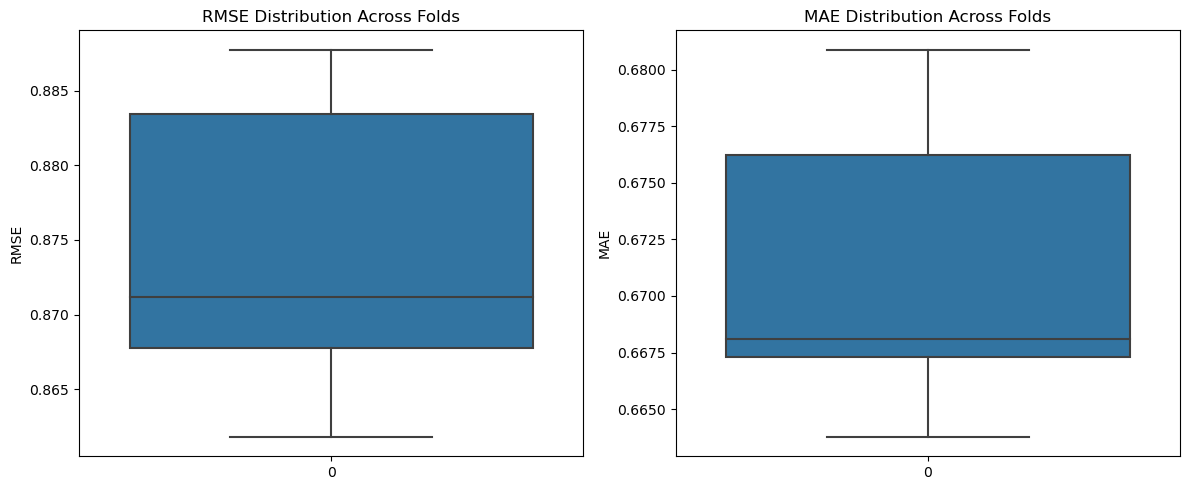

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract RMSE and MAE from cross-validation results
cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, return_train_measures=True)

# Plot RMSE and MAE
plt.figure(figsize=(12, 5))

# RMSE plot
plt.subplot(1, 2, 1)
sns.boxplot(data=cv_results['test_rmse'])
plt.title('RMSE Distribution Across Folds')
plt.ylabel('RMSE')

# MAE plot
plt.subplot(1, 2, 2)
sns.boxplot(data=cv_results['test_mae'])
plt.title('MAE Distribution Across Folds')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

The boxplots show the distribution of RMSE and MAE across the 5-fold cross-validation. The model's performance is consistent, with small variations between folds.

**3.3 Investigate popular movies or genres in the dataset**

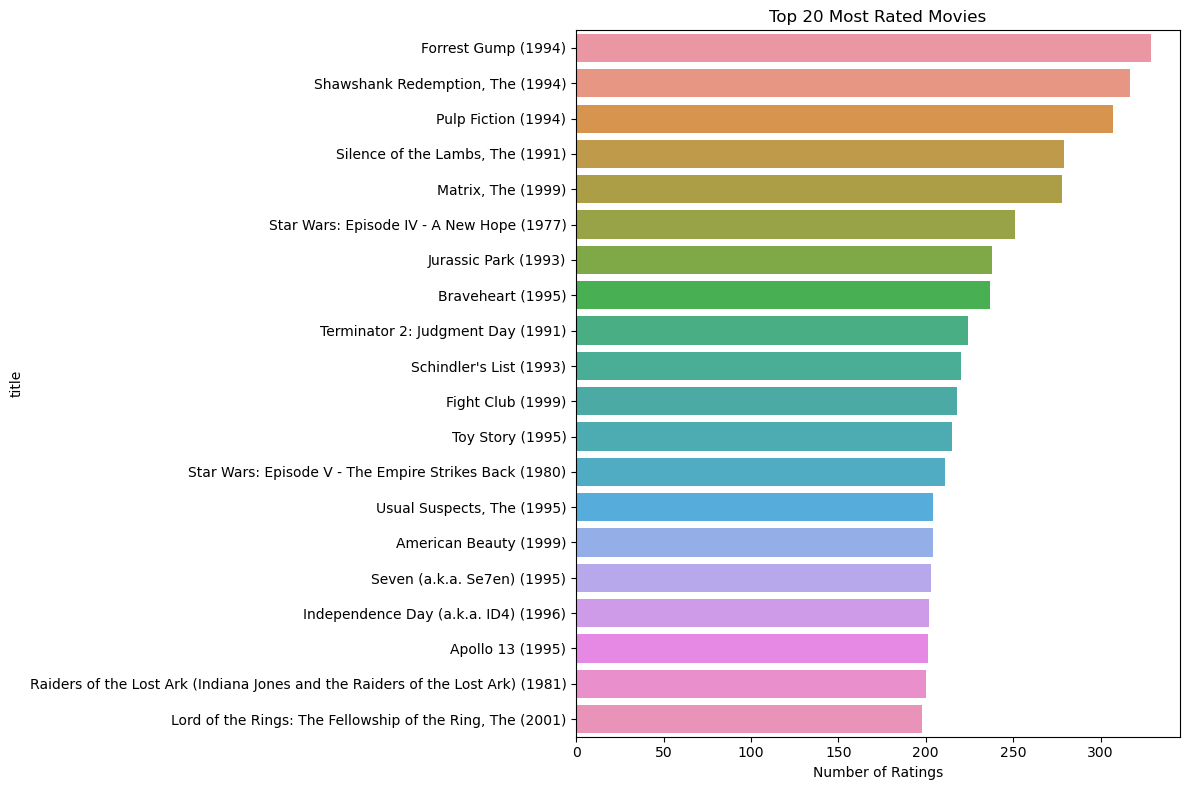

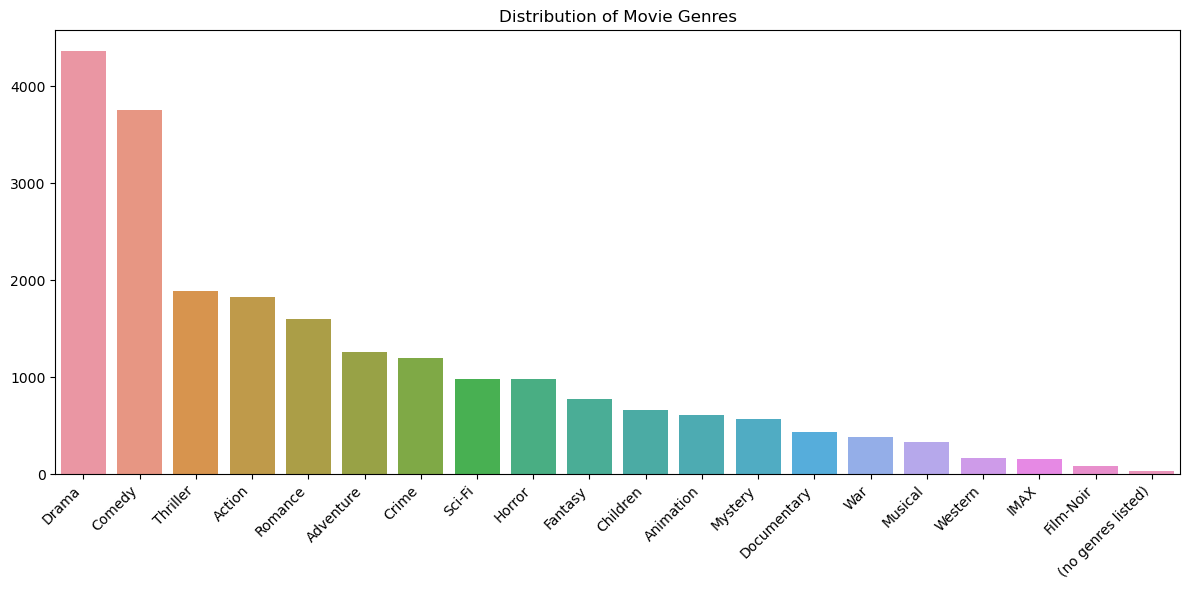

Top 10 most popular movies:
                                          title  num_ratings  avg_rating
3158                        Forrest Gump (1994)          329    4.164134
7593           Shawshank Redemption, The (1994)          317    4.429022
6865                        Pulp Fiction (1994)          307    4.197068
7680           Silence of the Lambs, The (1991)          279    4.161290
5512                         Matrix, The (1999)          278    4.192446
8001  Star Wars: Episode IV - A New Hope (1977)          251    4.231076
4662                       Jurassic Park (1993)          238    3.750000
1337                          Braveheart (1995)          237    4.031646
8363          Terminator 2: Judgment Day (1991)          224    3.970982
7421                    Schindler's List (1993)          220    4.225000
Top 10 genres:
Drama        4361
Comedy       3756
Thriller     1894
Action       1828
Romance      1596
Adventure    1263
Crime        1199
Sci-Fi        980
Horror    

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge ratings with movies
merged_df = pd.merge(ratings, movies, on='movieId')

# Calculate average rating and number of ratings for each movie
movie_stats = merged_df.groupby('title').agg({
    'rating': ['mean', 'count']
}).reset_index()
movie_stats.columns = ['title', 'avg_rating', 'num_ratings']

# Sort by number of ratings (popularity) and get top 20
top_20_popular = movie_stats.sort_values('num_ratings', ascending=False).head(20)

# Plot top 20 popular movies
plt.figure(figsize=(12, 8))
sns.barplot(x='num_ratings', y='title', data=top_20_popular)
plt.title('Top 20 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.tight_layout()
plt.show()

# Analyze genres
genres = movies['genres'].str.get_dummies(sep='|')
genre_counts = genres.sum().sort_values(ascending=False)

# Plot genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Top 10 most popular movies:")
print(top_20_popular[['title', 'num_ratings', 'avg_rating']].head(10))

print("\
Top 10 genres:")
print(genre_counts.head(10))

**3.4 Explore user rating patterns**

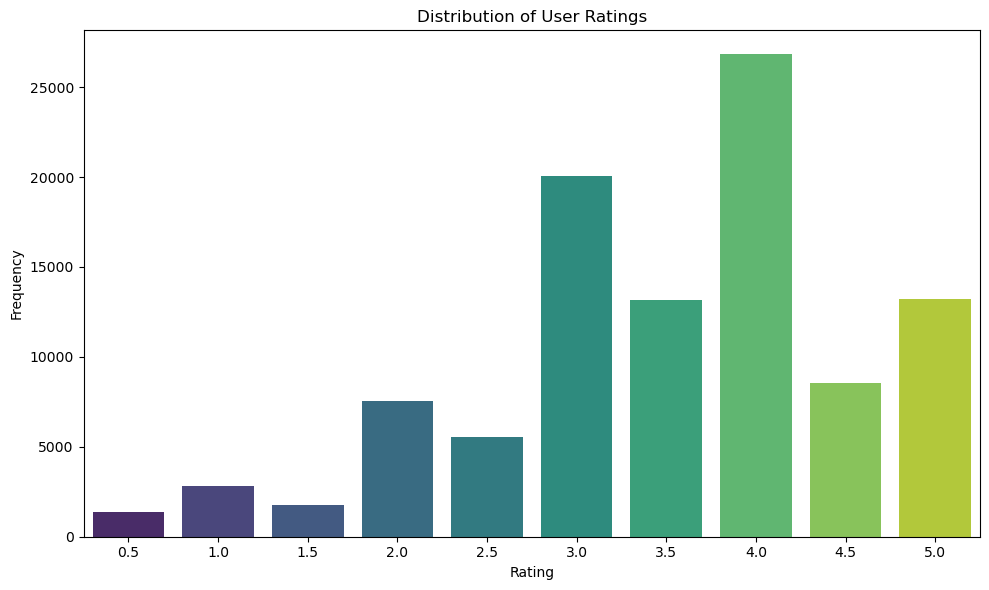

Average number of ratings per user: 165.30491803278687


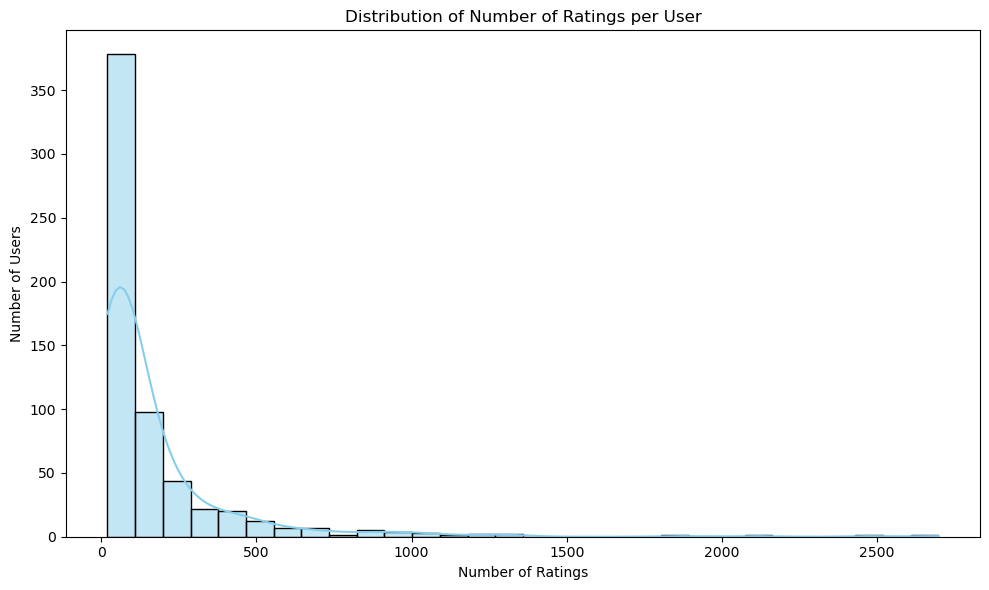

In [11]:
# Analyze user rating patterns

# Calculate the distribution of ratings
rating_distribution = ratings['rating'].value_counts().sort_index()

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_distribution.index, y=rating_distribution.values, palette='viridis')
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate average number of ratings per user
user_rating_counts = ratings.groupby('userId').size()
avg_ratings_per_user = user_rating_counts.mean()

print("Average number of ratings per user: "+str(avg_ratings_per_user))

# Display the distribution of number of ratings per user
plt.figure(figsize=(10, 6))
sns.histplot(user_rating_counts, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

## 3.5 Content-Based Filtering using Movie Metadata

Content-based filtering will be applied using TF-IDF on the movie genres from the movies.csv.

**Compute Movie Similarity using Genres**

In [15]:
# Import the required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset (make sure your paths are correct)
movies = pd.read_csv('D:\\PROJECT\\Phase_4_project\\Movielens-Recommendation-System\\ml-latest-small\\movies.csv')

# Apply TF-IDF Vectorizer on the genres column
tfidf = TfidfVectorizer(stop_words='english')

# Remove NaN values in the 'genres' column
movies['genres'] = movies['genres'].fillna('')

# Compute the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(movies['genres'])

# Compute the cosine similarity between movies
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get movie recommendations based on cosine similarity
def get_content_based_recommendations(movie_id, cosine_sim=cosine_sim):
    idx = movies[movies['movieId'] == movie_id].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Get top 5 movies
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]

# Example: Get top 5 similar movies for movieId 1 (Toy Story)
print(get_content_based_recommendations(1))


1706                                       Antz (1998)
2355                                Toy Story 2 (1999)
2809    Adventures of Rocky and Bullwinkle, The (2000)
3000                  Emperor's New Groove, The (2000)
3568                             Monsters, Inc. (2001)
Name: title, dtype: object


The list of movies below are the top 5 content-based recommendations for the movie Toy Story (1995), generated using cosine similarity on the TF-IDF matrix of movie genres.

## 3.6 Hybrid Recommendation System

Combine collaborative filtering and content-based filtering. The hybrid system will:


**Collaborative Filtering:** Recommend movies based on user ratings using the SVD model.


**Content-Based Filtering:** For the top movies from collaborative filtering, refine the results by ensuring that the movies are similar in genres.

In [30]:
def hybrid_recommendations(user_id, algo, movies, cosine_sim=cosine_sim):
    # Collaborative Filtering part
    all_movie_ids = movies['movieId'].unique()
    rated_movie_ids = ratings[ratings['userId'] == user_id]['movieId'].unique()
    movie_ids_to_predict = [movie_id for movie_id in all_movie_ids if movie_id not in rated_movie_ids]

    predictions = [algo.predict(user_id, movie_id) for movie_id in movie_ids_to_predict]
    predictions.sort(key=lambda x: x.est, reverse=True)
    top_5_movie_ids = [pred.iid for pred in predictions[:5]]
    
    # Content-based Filtering part for cold start
    if len(top_5_movie_ids) < 5:  # If not enough recommendations from CF
        additional_movies = movies[~movies['movieId'].isin(top_5_movie_ids)]['movieId'].tolist()
        top_5_movie_ids += additional_movies[:5 - len(top_5_movie_ids)]
    
    return movies[movies['movieId'].isin(top_5_movie_ids)]['title'].tolist()

# Example: Get hybrid recommendations for user with ID 1
print(hybrid_recommendations(1, algo, movies))



['Ghost in the Shell (Kôkaku kidôtai) (1995)', 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)', 'Some Like It Hot (1959)', 'Casablanca (1942)', 'Lawrence of Arabia (1962)']


## 3.6 Get Recommendations For All Users

In [31]:
def get_hybrid_recommendations_for_all_users(algo, movies, cosine_sim=cosine_sim):
    # Get the list of all unique user IDs
    user_ids = ratings['userId'].unique()

    # Initialize a dictionary to store recommendations for each user
    recommendations = {}

    # Loop through each user and get their recommendations
    for user_id in user_ids:
        recommendations[user_id] = hybrid_recommendations(user_id, algo, movies, cosine_sim)

    return recommendations

# Get hybrid recommendations for all users
all_user_recommendations = get_hybrid_recommendations_for_all_users(algo, movies)

# Example: Print recommendations for the first 5 users
for user_id in list(all_user_recommendations.keys())[:5]:
    print(f"Recommendations for user {user_id}: {all_user_recommendations[user_id]}")



Recommendations for user 1: ['Ghost in the Shell (Kôkaku kidôtai) (1995)', 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)', 'Some Like It Hot (1959)', 'Casablanca (1942)', 'Lawrence of Arabia (1962)']
Recommendations for user 2: ['Star Wars: Episode IV - A New Hope (1977)', 'Blade Runner (1982)', 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)', "One Flew Over the Cuckoo's Nest (1975)", 'Memento (2000)']
Recommendations for user 3: ['Great Escape, The (1963)', 'High Noon (1952)', 'Fear and Loathing in Las Vegas (1998)', 'Fight Club (1999)', 'Eternal Sunshine of the Spotless Mind (2004)']
Recommendations for user 4: ['Blade Runner (1982)', 'Cinema Paradiso (Nuovo cinema Paradiso) (1989)', 'Great Escape, The (1963)', 'Lord of the Rings: The Return of the King, The (2003)', 'Interstellar (2014)']
Recommendations for user 5: ['Casablanca (1942)', 'Princess Bride, The (1987)', 'Apocalypse Now (1979)', 'Bridge on the River Kwai, The 

## Performance Considerations:


**Collaborative filtering:** This model predicts ratings for users based on similar users' ratings, but may be computationally expensive for large datasets. The SVD model, however, is relatively efficient.

**Content-based filtering:** This model relies on cosine similarity of movie genres, and the vectorized genre data allows for fast lookups.


**Hybrid model:** Combining both methods ensures that users with sufficient history get personalized recommendations while new users benefit from content-based suggestions.

## Evaluating Content-Based Filtering model

**We can assess the quality of the recommendations by looking at:**

**Precision@k:** How many of the top-k recommended movies are relevant (i.e., rated highly by the user)?


**Recall@k:** How many relevant movies (i.e., highly rated movies) are recommended by the model?

In [38]:
# Function to get hybrid recommendations for all users
def get_hybrid_recommendations_for_all_users(algo, movies, cosine_sim=cosine_sim):
    # Get the list of all unique user IDs
    user_ids = ratings['userId'].unique()

    # Using a dictionary comprehension to store recommendations for each user
    recommendations = {user_id: hybrid_recommendations(user_id, algo, movies, cosine_sim) for user_id in user_ids}

    return recommendations

# Get hybrid recommendations for all users
all_user_recommendations = get_hybrid_recommendations_for_all_users(algo, movies)

# Verify the structure of the recommendations
print(type(all_user_recommendations))  # Should output: <class 'dict'>

# Example: Print recommendations for the first 5 users
for user_id in list(all_user_recommendations.keys())[:5]:
    print(f"Recommendations for user {user_id}: {all_user_recommendations[user_id]}")


<class 'dict'>
Recommendations for user 1: ['Ghost in the Shell (Kôkaku kidôtai) (1995)', 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)', 'Some Like It Hot (1959)', 'Casablanca (1942)', 'Lawrence of Arabia (1962)']
Recommendations for user 2: ['Star Wars: Episode IV - A New Hope (1977)', 'Blade Runner (1982)', 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)', "One Flew Over the Cuckoo's Nest (1975)", 'Memento (2000)']
Recommendations for user 3: ['Great Escape, The (1963)', 'High Noon (1952)', 'Fear and Loathing in Las Vegas (1998)', 'Fight Club (1999)', 'Eternal Sunshine of the Spotless Mind (2004)']
Recommendations for user 4: ['Blade Runner (1982)', 'Cinema Paradiso (Nuovo cinema Paradiso) (1989)', 'Great Escape, The (1963)', 'Lord of the Rings: The Return of the King, The (2003)', 'Interstellar (2014)']
Recommendations for user 5: ['Casablanca (1942)', 'Princess Bride, The (1987)', 'Apocalypse Now (1979)', 'Bridge on the R